In [25]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars = star_wars[star_wars["RespondentID"].notnull()]

yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [26]:
import numpy
from numpy import nan

movie_name = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    numpy.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_name)

star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
})

star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [27]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6",
})

star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

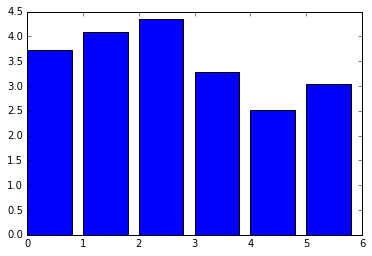

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

plt.show()

In [29]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

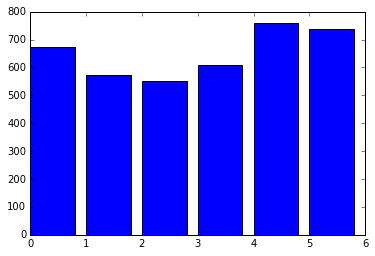

In [30]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

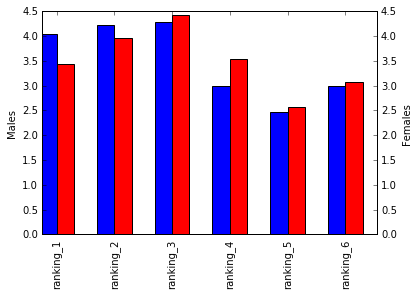

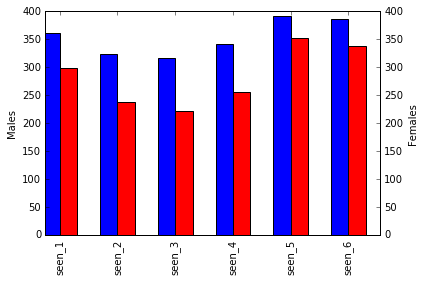

In [38]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
males[males.columns[9:15]].mean()
females[females.columns[9:15]].mean()

# Movie ranking between genders
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)
ax2 = ax.twinx()

width = 0.3

males[males.columns[9:15]].mean().plot(kind='bar', color='blue', ax=ax, width=width, position=1)
females[females.columns[9:15]].mean().plot(kind='bar', color='red', ax=ax2, width=width, position=0)

ax.set_ylabel('Males')
ax2.set_ylabel("Females")

# Movies seen between genders

fig2 = plt.figure()
axx = fig2.add_subplot(1, 1, 1)
axx2 = axx.twinx()

width = 0.3

males[males.columns[3:9]].sum().plot(kind='bar', color='blue', ax=axx, width=width, position=1)
females[females.columns[3:9]].sum().plot(kind='bar', color='red', ax=axx2, width=width, position=0)

axx.set_ylabel('Males')
axx2.set_ylabel("Females")

plt.show()

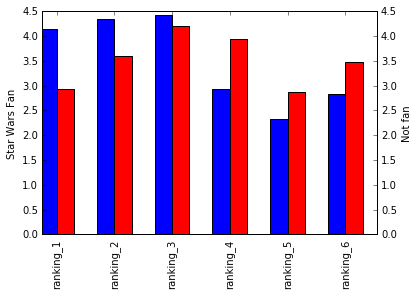

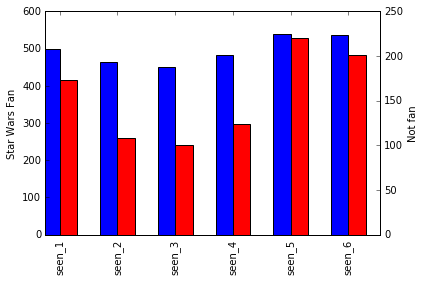

In [40]:
sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
sw_anti = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

# Movie ranking between Star Wars fans
fig2 = plt.figure()
ax_sw = fig2.add_subplot(1, 1, 1)
ax_sw2 = ax_sw.twinx()

width = 0.3

sw_fan[sw_fan.columns[9:15]].mean().plot(kind='bar', color='blue', ax=ax_sw, width=width, position=1)
sw_anti[sw_anti.columns[9:15]].mean().plot(kind='bar', color='red', ax=ax_sw2, width=width, position=0)

ax_sw.set_ylabel('Star Wars Fan')
ax_sw2.set_ylabel("Not fan")

# Movies seen between Star Wars fans

fig3 = plt.figure()
axx_sw = fig3.add_subplot(1, 1, 1)
axx_sw2 = axx_sw.twinx()

width = 0.3

sw_fan[sw_fan.columns[3:9]].sum().plot(kind='bar', color='blue', ax=axx_sw, width=width, position=1)
sw_anti[sw_anti.columns[3:9]].sum().plot(kind='bar', color='red', ax=axx_sw2, width=width, position=0)

axx_sw.set_ylabel('Star Wars Fan')
axx_sw2.set_ylabel("Not fan")

plt.show()

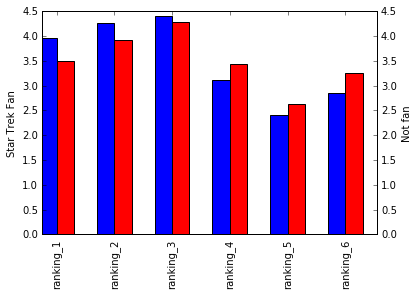

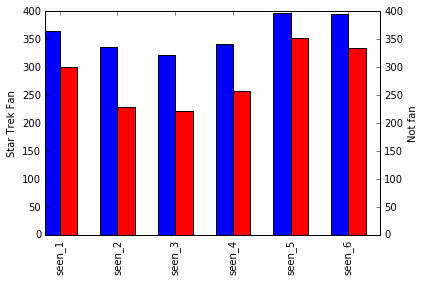

In [43]:
st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
st_anti = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

# Movie ranking between Star Wars fans
fig4 = plt.figure()
ax_st = fig4.add_subplot(1, 1, 1)
ax_st2 = ax_st.twinx()

width = 0.3

st_fan[st_fan.columns[9:15]].mean().plot(kind='bar', color='blue', ax=ax_st, width=width, position=1)
st_anti[st_anti.columns[9:15]].mean().plot(kind='bar', color='red', ax=ax_st2, width=width, position=0)

ax_st.set_ylabel('Star Trek Fan')
ax_st2.set_ylabel("Not fan")

# Movies seen between Star Wars fans

fig5 = plt.figure()
axx_st = fig5.add_subplot(1, 1, 1)
axx_st2 = axx_st.twinx()

width = 0.3

st_fan[st_fan.columns[3:9]].sum().plot(kind='bar', color='blue', ax=axx_st, width=width, position=1)
st_anti[st_anti.columns[3:9]].sum().plot(kind='bar', color='red', ax=axx_st2, width=width, position=0)

axx_st.set_ylabel('Star Trek Fan')
axx_st2.set_ylabel("Not fan")

plt.show()